## Importing necessary Libraries

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts
from scipy.stats import f
from pandas.plotting import table
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import permutations as pmr
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', None)
sns.set_style('whitegrid')

### Calling data and checking basic summary

In [367]:
df = pd.read_csv('D:\Datasets\Insurance\insurance.csv')

In [368]:
print(df.head(5))
print('_'*65)
print(df.tail(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
_________________________________________________________________
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [369]:
df.shape

(1338, 7)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [371]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [372]:
df = df.drop_duplicates()

In [373]:
df.shape

(1337, 7)

In [374]:
# df['children'] = df['children'].astype(str)

In [375]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [376]:
df.columns = df.columns.str.title()

### Univariate distributions

In [377]:
def uni_func(x):
    d = df[x].value_counts().reset_index().rename(columns = {'index':x,
                                                               x:'Count'})
    d['Proportion'] = (100*d['Count']/sum(d['Count'])).round(2).astype(str) + ' %'

    fig = plt.figure(figsize = (12, 4)) 
    gs = fig.add_gridspec(1, 2, width_ratios = [1, 2])

    # creating the table:
    ax1 = fig.add_subplot(gs[0])
    plt.axis('off')
    t = table(ax1, d, loc = 'center')
    t.auto_set_font_size(False)
    t.scale(1.5, 1.8)
    t.set_fontsize(14)

    # creating the barplot:
    ax2 = fig.add_subplot(gs[1])
    s = sns.barplot(x = x, y = 'Count', 
           data = d, color = '#218FD6', ax = ax2)
    s.set_title('Distribution of ' + x + '\n',
           fontdict = {'weight':'bold', 'size':18})
    s.set_xlabel('\nLabels', fontdict = {'weight':'bold', 'size':14})
    s.set_ylabel('Frequency\n', fontdict = {'weight':'bold', 'size':14})
    s.set_xticklabels(s.get_xticklabels(), rotation = 30,
                     fontdict = {'weight':'bold'})

    plt.subplots_adjust(wspace = 0.5)
    plt.show()

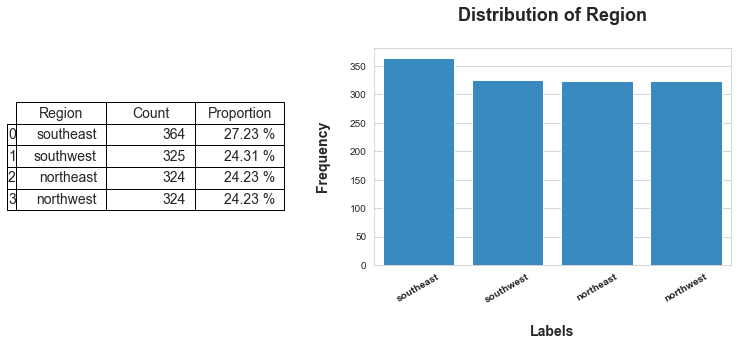

In [378]:
uni_func('Region')

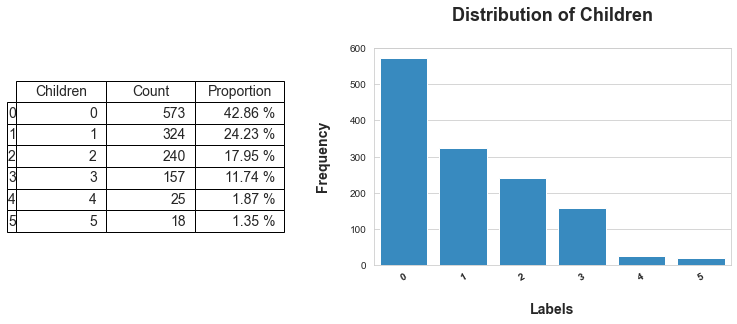

In [379]:
uni_func('Children')

In [380]:
# df['Children'] = ['No' if i == 0 else 'Yes' for i in df['Children']]

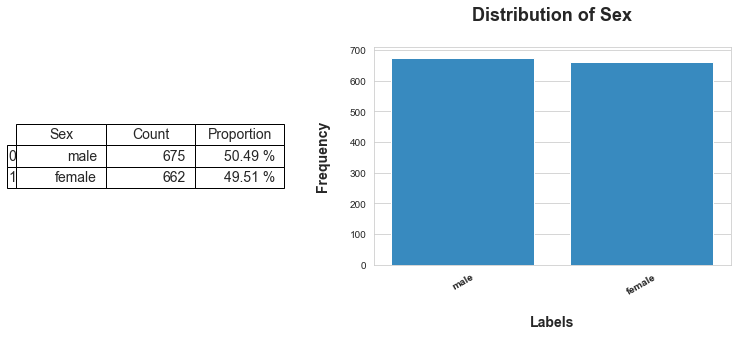

In [381]:
uni_func('Sex')

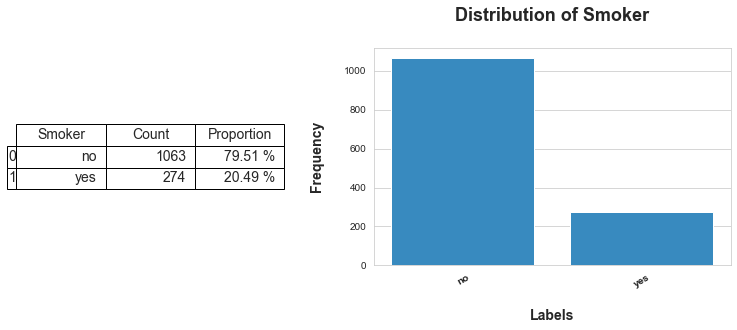

In [382]:
uni_func('Smoker')

In [383]:
def cont_func(x):
    d = df[x].describe(percentiles = [0.1,0.25,0.5,0.75,0.9]).drop('count').reset_index(
    ).rename(columns = {'index':'Statistics', x:'Values'}).round(2)
    
    fig = plt.figure(figsize = (16, 4)) 
    gs = fig.add_gridspec(1, 3, width_ratios = [1, 3, 3])

    # creating the table:
    ax1 = fig.add_subplot(gs[0])
    plt.axis('off')
    t = table(ax1, d, loc = 'center')
    t.auto_set_font_size(False)
    t.scale(1.5, 1.8)
    t.set_fontsize(14)

    # creating the boxplot:
    ax2 = fig.add_subplot(gs[1])
    s = sns.boxplot(y = df[x], ax = ax2, color = '#FDBD04',
                   width = 0.4)
    s.set_title('Boxplot of '+ x + '\n',
               fontdict = {'weight':'bold', 'size':18})
    s.set_xlabel(x, fontdict = {'weight':'bold', 'size':14})
    s.set_ylabel(' ')
    
    # creating the histogram:
    ax3 = fig.add_subplot(gs[2])
    s = sns.kdeplot(x = df[x], fill = True, ax = ax3, color = '#FDBD04')
    s.set_title('Histogram of '+ x + '\n',
               fontdict = {'weight':'bold', 'size':18})
    s.set_xlabel(x, fontdict = {'weight':'bold', 'size':14})
    s.set_ylabel('Frequency density\n', fontdict = {'weight':'bold', 'size':14})

    plt.subplots_adjust(wspace = 0.5)
    plt.show()

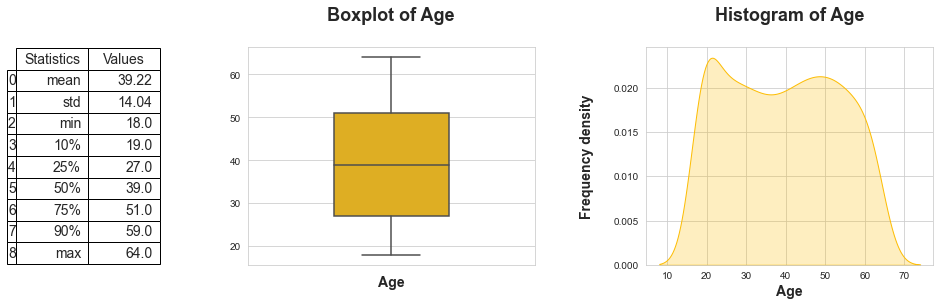

In [384]:
cont_func('Age')

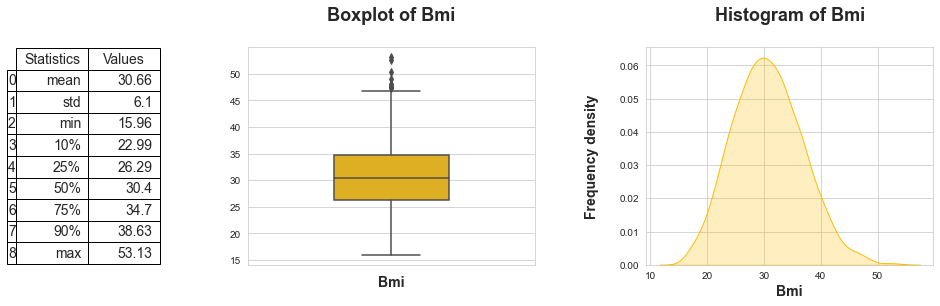

In [385]:
cont_func('Bmi')

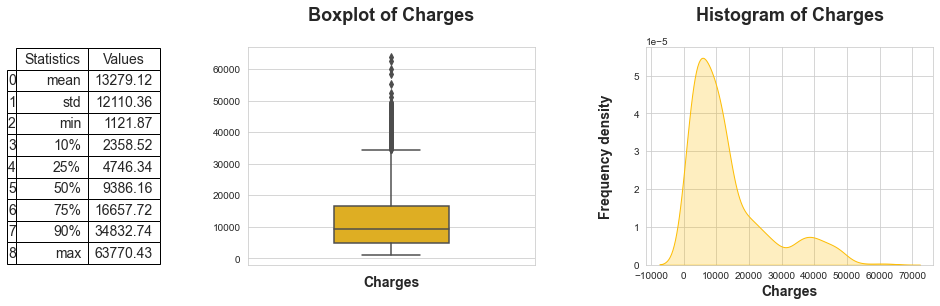

In [386]:
cont_func('Charges')

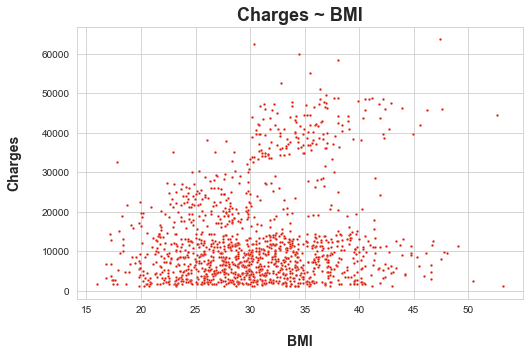

In [387]:
plt.figure(figsize = (8,5))
s = sns.scatterplot(x = 'Bmi', y = 'Charges',
               data = df, s = 6, color = '#DD1400')
s.set_title('Charges ~ BMI', fontdict = {'weight':'bold',
                                        'size':18})
s.set_xlabel('\nBMI', fontdict = {'weight':'bold',
                                        'size':14})
s.set_ylabel('Charges\n', fontdict = {'weight':'bold',
                                        'size':14})

r_sq = (df['Charges'].corr(df['Bmi'])**2).round(4)
plt.show()

In [388]:
def cont_cont(x):
    r_sq = (df['Charges'].corr(df[x])**2).round(4)
    
    plt.figure(figsize = (10,6))
    s = sns.regplot(x = x, y = 'Charges',
               data = df, color = '#DD1400', ci = False, 
                   scatter_kws = {'s':4, "color": "red"}, line_kws = {"color": "black"})
    s.set_title('Charges ~ ' + x + '\n', 
                fontdict = {'weight':'bold', 'size':18})
    s.set_xlabel('\n' + x, fontdict = {'weight':'bold',
                                        'size':14})
    s.set_ylabel('Charges\n', fontdict = {'weight':'bold',
                                        'size':14})
    plt.text(np.min(df[x]), 69000, r'$[R^2$: ' + str(r_sq) + '$]$',
             fontsize = 12, color = '#2C9203')
    plt.show()
    
    # fiting model:
    X = sm.add_constant(df[x])
    Y = df['Charges']

    # Fit the linear regression model
    model = sm.OLS(Y, X).fit()

    # View the summary table
    print(model.summary())

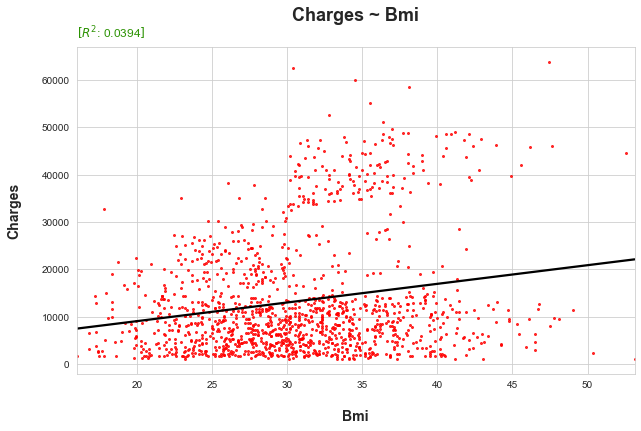

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.70
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.47e-13
Time:                        16:06:50   Log-Likelihood:                -14440.
No. Observations:                1337   AIC:                         2.888e+04
Df Residuals:                    1335   BIC:                         2.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1202.1404   1664.857      0.722      0.4

In [389]:
cont_cont('Bmi')

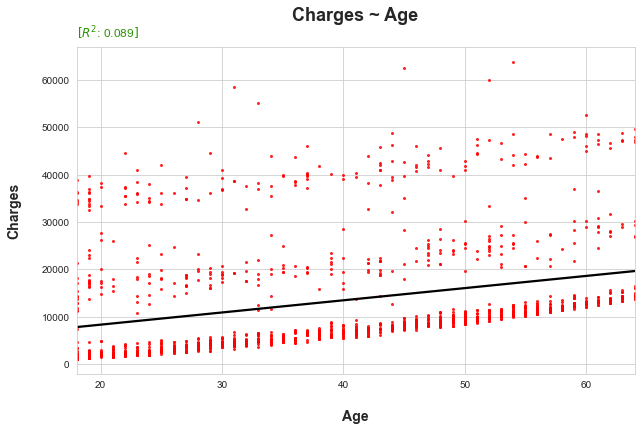

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Thu, 02 May 2024   Prob (F-statistic):           6.98e-29
Time:                        16:06:50   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3190.0217    938.396      3.399      0.0

In [390]:
cont_cont('Age')

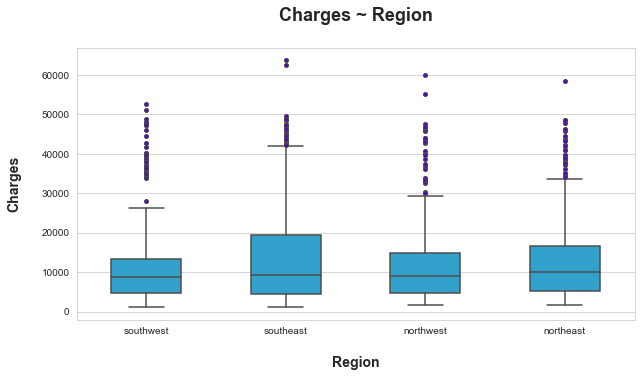

---------------------------------------------------------------------------------------------------- 
ANOVA Result:
              df        sum_sq       mean_sq        F    PR(>F)
Region       3.0  1.281906e+09  4.273019e+08  2.92614  0.032763
Residual  1333.0  1.946569e+11  1.460292e+08      NaN       NaN


In [391]:
def cont_cat(x):
    plt.figure(figsize = (10,5))
    s = sns.boxplot(x = x, y = 'Charges', data = df, width = 0.5, 
            flierprops = dict(marker = 'o', markerfacecolor = '#5207C4', markersize = 4),
           color = '#18ADE5')
    s.set_title('Charges ~ ' + x + '\n', 
                fontdict = {'weight':'bold', 'size':18})
    s.set_xlabel('\n' + x, fontdict = {'weight':'bold',
                                        'size':14})
    s.set_ylabel('Charges\n', fontdict = {'weight':'bold',
                                        'size':14})
    plt.show()
    
    print('-'*100,'\nANOVA Result:')
    # ANOVA
    model = ols('Charges ~ ' + x, data = df).fit()
    print(sm.stats.anova_lm(model, type = 2))
    
cont_cat('Region')

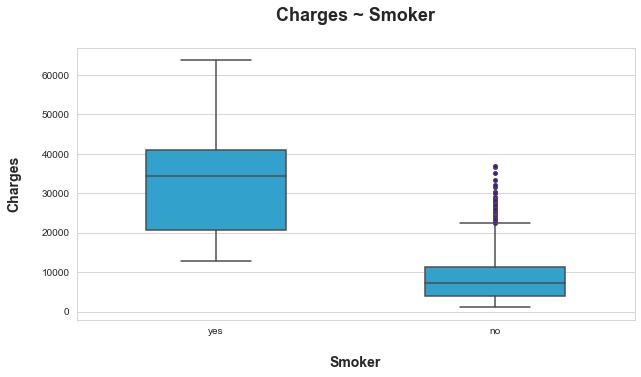

---------------------------------------------------------------------------------------------------- 
ANOVA Result:
              df        sum_sq       mean_sq            F         PR(>F)
Smoker       1.0  1.214307e+11  1.214307e+11  2175.736863  1.406722e-282
Residual  1335.0  7.450811e+10  5.581132e+07          NaN            NaN


In [392]:
cont_cat('Smoker')

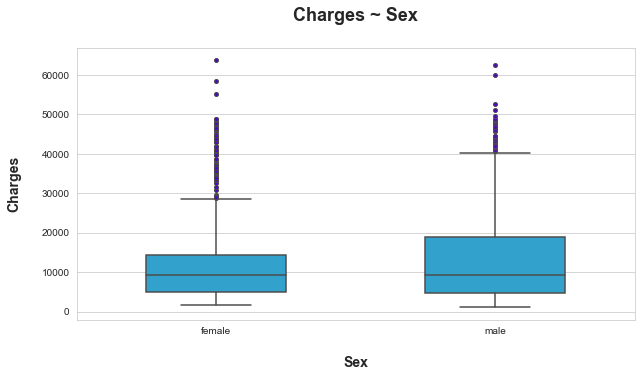

---------------------------------------------------------------------------------------------------- 
ANOVA Result:
              df        sum_sq       mean_sq         F    PR(>F)
Sex          1.0  6.601500e+08  6.601500e+08  4.513038  0.033821
Residual  1335.0  1.952787e+11  1.462762e+08       NaN       NaN


In [393]:
cont_cat('Sex')

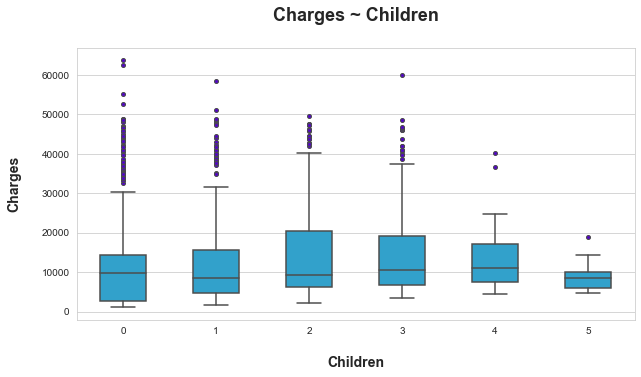

---------------------------------------------------------------------------------------------------- 
ANOVA Result:
              df        sum_sq       mean_sq         F    PR(>F)
Children     1.0  8.898219e+08  8.898219e+08  6.090326  0.013717
Residual  1335.0  1.950490e+11  1.461041e+08       NaN       NaN


In [394]:
cont_cat('Children')

### Box-Cox Transformation

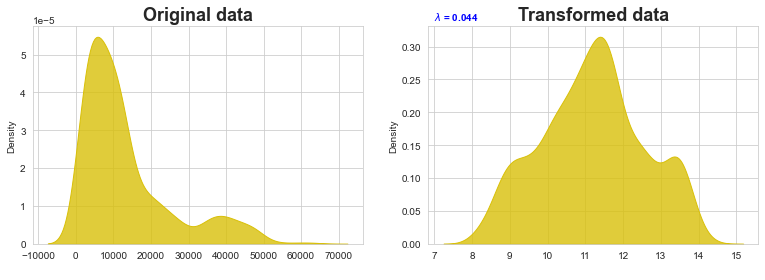

In [395]:
Y = df['Charges']
Y_new, lambda_hat = sts.boxcox(Y)


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13,4))
s1 = sns.kdeplot(x = Y, fill = True, alpha = 0.8, ax = ax[0], color = '#D9C008')
s1.set_title('Original data', fontdict = {'weight':'bold', 'size':18})
s1.set_xlabel(' ')
s2 = sns.kdeplot(x = Y_new, fill = True, alpha = 0.8, ax = ax[1], color = '#D9C008')
s2.set_title('Transformed data', fontdict = {'weight':'bold', 'size':18})
plt.text(7, 0.34, r'$\lambda$ = ' + str(round(lambda_hat, 3)),
        fontdict = {'weight':'bold', 'color':'blue'})

plt.show()

In [396]:
df['Y_new'] = Y_new
df_copy = df.drop('Charges', axis = 1)

In [397]:
df.head(5)

,Age,Sex,Bmi,Children,Smoker,Region,Charges,Y_new
0,19,female,27.900,0,yes,southwest,16884.92400,12.120634
1,18,male,33.770,1,no,southeast,1725.55230,8.804026
2,28,male,33.000,3,no,southeast,4449.46200,10.141549
3,33,male,22.705,0,no,northwest,21984.47061,12.526076
4,32,male,28.880,0,no,northwest,3866.85520,9.939887


In [398]:
df_copy.head(5)

,Age,Sex,Bmi,Children,Smoker,Region,Y_new
0,19,female,27.900,0,yes,southwest,12.120634
1,18,male,33.770,1,no,southeast,8.804026
2,28,male,33.000,3,no,southeast,10.141549
3,33,male,22.705,0,no,northwest,12.526076
4,32,male,28.880,0,no,northwest,9.939887


### Box-Tidwell transformation

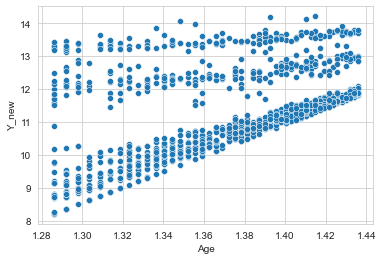

0.5236034213768773

In [399]:
x = df['Age']**(0.087)
sns.scatterplot(x = x, y = 'Y_new', data = df)
plt.show()

x.corr(df['Y_new'])

In [400]:
for i in df_copy[['Age','Bmi']].columns:
    d1 = pd.DataFrame({"1":np.ones_like(df_copy[i]),"2":df_copy[i]})
    d2 = pd.DataFrame({"1":np.ones_like(df_copy[i]),"2":df_copy[i],"3":df_copy[i]*np.log(df_copy[i])})
    beta1 = np.linalg.lstsq(d1.values, df_copy['Y_new'].values, rcond=None)[0]
    beta2 = np.linalg.lstsq(d2.values, df_copy['Y_new'].values, rcond=None)[0]
    alpha = (beta2[-1]/beta1[-1])+1
    print(round(alpha,3))
    df_copy[i] = df_copy[i]**alpha

0.087
-1.735


* For 'Age': $\alpha = \small{0.087}$ 
* For 'BMI': $\alpha = \small{-1.735}$

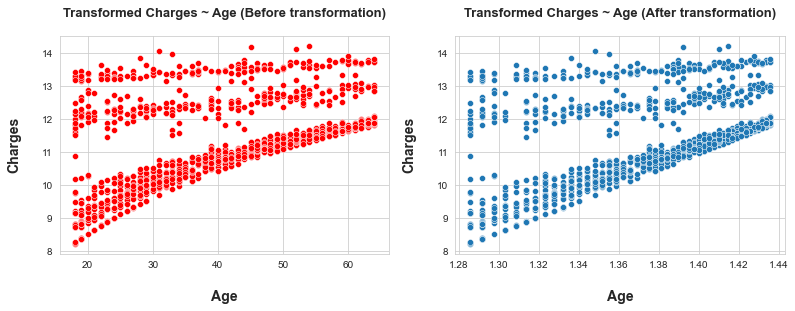

In [401]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13,4))

s1 = sns.scatterplot(x = 'Age', y = 'Y_new', data = df, ax = ax[0],
                    color = 'red')
s1.set_title('Transformed Charges ~ Age (Before transformation)' + '\n', 
                fontdict = {'weight':'bold', 'size':13})
s1.set_xlabel('\nAge', fontdict = {'weight':'bold',
                                        'size':14})
s1.set_ylabel('Charges\n', fontdict = {'weight':'bold',
                                        'size':14})
s2 = sns.scatterplot(x = 'Age', y = 'Y_new', data = df_copy, ax = ax[1])
s2.set_title('Transformed Charges ~ Age (After transformation)' + '\n', 
                fontdict = {'weight':'bold', 'size':13})
s2.set_xlabel('\nAge', fontdict = {'weight':'bold',
                                        'size':14})
s2.set_ylabel('Charges\n', fontdict = {'weight':'bold',
                                        'size':14})    
plt.show()

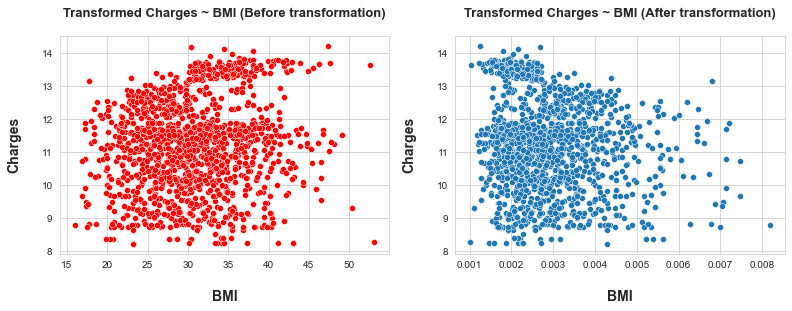

In [402]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13,4))

s1 = sns.scatterplot(x = 'Bmi', y = 'Y_new', data = df, ax = ax[0],
                    color = 'red')
s1.set_title('Transformed Charges ~ BMI (Before transformation)' + '\n', 
                fontdict = {'weight':'bold', 'size':13})
s1.set_xlabel('\nBMI', fontdict = {'weight':'bold',
                                        'size':14})
s1.set_ylabel('Charges\n', fontdict = {'weight':'bold',
                                        'size':14})
s2 = sns.scatterplot(x = 'Bmi', y = 'Y_new', data = df_copy, ax = ax[1])
s2.set_title('Transformed Charges ~ BMI (After transformation)' + '\n', 
                fontdict = {'weight':'bold', 'size':13})
s2.set_xlabel('\nBMI', fontdict = {'weight':'bold',
                                        'size':14})
s2.set_ylabel('Charges\n', fontdict = {'weight':'bold',
                                        'size':14})    
plt.show()

### Train-Test Split

In [403]:
df_copy.head(5)

Y = df_copy['Y_new']
X = df_copy.drop('Y_new', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
# X_train = X_train.reset_index().drop('index', axis = 1)
# X_test = X_test.reset_index().drop('index', axis = 1)

X_train.head(5)
X_train.shape

(935, 6)

### Added variable plot

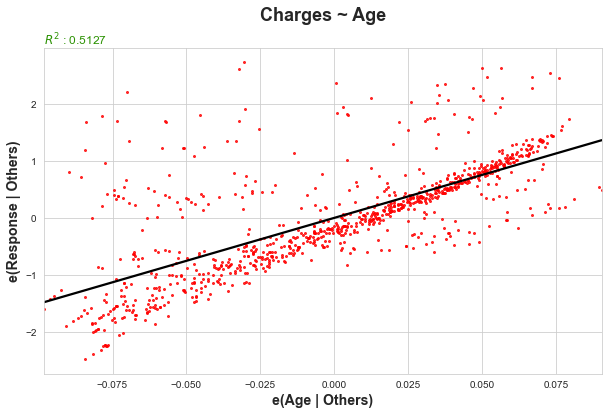

In [404]:
def add_var(x):
    def resid(x,y):
        x = sm.add_constant(pd.get_dummies(x, drop_first = True))
        M = sm.OLS(y,x).fit()
        return M.resid
    
    # Storing the set of other variables:
    X_new = X_train.drop(x, axis = 1)
    
    # y ~ x_others
    r1 = resid(X_new, Y_train)
    
    # x ~ x_others
    r2 = resid(X_new, X_train[x])
    
    r_sq = (r1.corr(r2)**2).round(4)
    
    plt.figure(figsize = (10,6))
    s = sns.regplot(x = r2, y = r1, color = '#DD1400', ci = False, 
                   scatter_kws = {'s':4, "color": "red"}, line_kws = {"color": "black"})
    s.set_title('Charges ~ ' + x + '\n', 
                fontdict = {'weight':'bold', 'size':18})
    s.set_xlabel('e(' + x + ' | Others)', fontdict = {'weight':'bold',
                                        'size':14})
    s.set_ylabel('e(Response | Others)', fontdict = {'weight':'bold',
                                        'size':14})
    plt.text(np.min(r2), np.max(r1) + 0.3, r'$R^2$ : ' + str(r_sq),
             fontsize = 12, color = '#2C9203')
    plt.show()
    
    
add_var('Age')

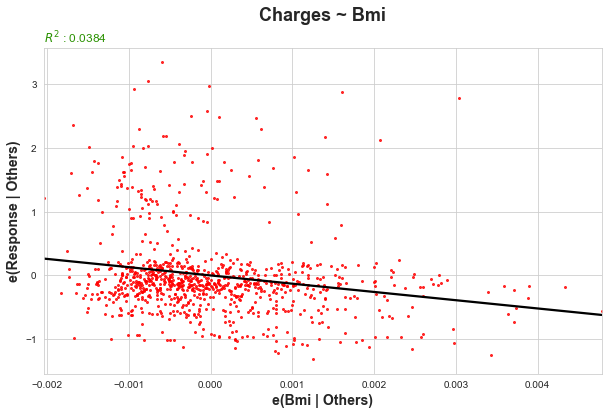

In [405]:
add_var('Bmi')

### Best SubSet Selection:

In [406]:
# Function to obtain the power set of a set:
def power_set(x):
    l = []
      
    def n_Choose_k(z,k):
        z = list(pmr(z))
        y = [sorted(i) for i in [(list(i))[0:k] for i in z]]
        y = list(set([tuple(i) for i in y]))
        return [list(i) for i in y]
    
    for i in range(1, len(x)+1):
        l += n_Choose_k(x,i)
    
    return l

In [407]:
def powerset(x):
    S = chain.from_iterable(combinations(x, r) for r in range(len(x)+1))
    return [list(k) for k in list(S)][1:]

X_train_dumm = pd.get_dummies(X_train, drop_first = True)
C = powerset(X_train_dumm.columns)

In [408]:
AIC = []
BIC = []
Adj_Rsq = []
Rsq = []

for var in C:
    X = sm.add_constant(X_train_dumm[var])
    Y = Y_train

    M = sm.OLS(Y,X).fit()
    
    Adj_Rsq.append(round(M.rsquared_adj,3))
    Rsq.append(round(M.rsquared,3))
    AIC.append(round(M.aic,3))
    BIC.append(round(M.bic,3))
    
best_df = pd.DataFrame({
    'Variable set': C,
    'Adjusted Rsq': Adj_Rsq,
    'R_Square': Rsq,
    'AIC': AIC, 'BIC': BIC
})

In [409]:
best_df.head(5)

,Variable set,Adjusted Rsq,R_Square,AIC,BIC
0,[Age],0.254,0.255,2942.177,2951.858
1,[Bmi],0.015,0.016,3202.822,3212.503
2,[Children],0.030,0.031,3188.634,3198.315
3,[Sex_male],-0.001,0.000,3217.632,3227.313
4,[Smoker_yes],0.448,0.448,2661.903,2671.584


In [410]:
best_subset_vars_adj = best_df.at[best_df['Adjusted Rsq'].idxmax(),'Variable set']
best_subset_vars_adj

['Age',
 'Bmi',
 'Children',
 'Sex_male',
 'Smoker_yes',
 'Region_northwest',
 'Region_southeast',
 'Region_southwest']

In [411]:
best_subset_vars_BIC = best_df.at[best_df['BIC'].idxmin(),'Variable set']
best_subset_vars_BIC

['Age', 'Bmi', 'Children', 'Smoker_yes']

In [412]:
best_subset_vars_AIC = best_df.at[best_df['AIC'].idxmin(),'Variable set']
best_subset_vars_AIC

['Age',
 'Bmi',
 'Children',
 'Sex_male',
 'Smoker_yes',
 'Region_southeast',
 'Region_southwest']

In [413]:
X_train_dumm_adj = X_train_dumm[best_subset_vars_adj]
X_train_dumm_BIC = X_train_dumm[best_subset_vars_BIC]
X_train_dumm_AIC = X_train_dumm[best_subset_vars_AIC]

In [414]:
X_train_dumm_adj.head(5)

,Age,Bmi,Children,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
138,1.414612,0.002464,3,0,0,0,1,0
381,1.416871,0.002635,0,1,1,0,0,0
292,1.322987,0.001329,2,1,1,0,1,0
1090,1.397637,0.001979,0,1,1,0,1,0
893,1.397637,0.001743,2,1,1,0,1,0


### Model fitting with the best subset of variables

- Using Adjusted $\small{R^2}$:

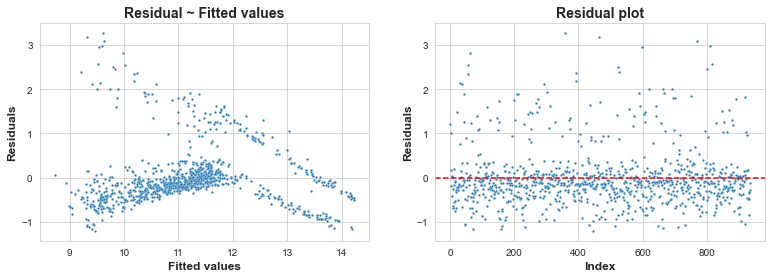

In [415]:
X = sm.add_constant(X_train_dumm_adj)
Y = Y_train
model_adj = sm.OLS(Y,X).fit()
# model.mse_model
# mse_sqrt = (np.sum((model.fittedvalues - Y)**2)/(len(Y)-1))**(0.5)

resid_adj = model_adj.resid
yhat_adj = model_adj.fittedvalues
# resid_studt = resid_best_adj/mse_sqrt

index = np.arange(1,len(resid_adj)+1)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13,4))
s1 = sns.scatterplot(x = yhat_adj, y = resid_adj, s = 6, ax = ax[0])
s1.set_title('Residual ~ Fitted values', fontdict = {'weight':'bold',
                                                    'size':14})
s1.set_xlabel('Fitted values', fontdict = {'weight':'bold',
                                                    'size':12})
s1.set_ylabel('Residuals', fontdict = {'weight':'bold', 'size':12})
s2 = sns.scatterplot(x = index, y = resid_adj, s = 6, ax = ax[1])
s2.set_title('Residual plot', fontdict = {'weight':'bold',
                                                    'size':14})
s2.set_xlabel('Index', fontdict = {'weight':'bold', 'size':12})
s2.set_ylabel('Residuals', fontdict = {'weight':'bold', 'size':12})
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

- Using **BIC**:

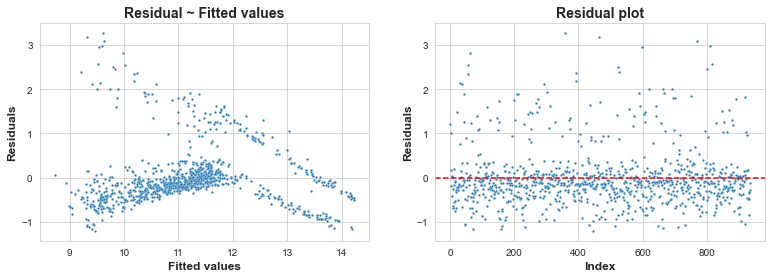

In [416]:
X = sm.add_constant(X_train_dumm_BIC)
Y = Y_train
model_BIC = sm.OLS(Y,X).fit()
# model.mse_model
# mse_sqrt = (np.sum((model.fittedvalues - Y)**2)/(len(Y)-1))**(0.5)

resid_BIC = model_BIC.resid
yhat_BIC = model_BIC.fittedvalues
# resid_studt = resid_best_adj/mse_sqrt

index = np.arange(1,len(resid_adj)+1)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13,4))
s1 = sns.scatterplot(x = yhat_adj, y = resid_adj, s = 6, ax = ax[0])
s1.set_title('Residual ~ Fitted values', fontdict = {'weight':'bold',
                                                    'size':14})
s1.set_xlabel('Fitted values', fontdict = {'weight':'bold',
                                                    'size':12})
s1.set_ylabel('Residuals', fontdict = {'weight':'bold', 'size':12})
s2 = sns.scatterplot(x = index, y = resid_adj, s = 6, ax = ax[1])
s2.set_title('Residual plot', fontdict = {'weight':'bold',
                                                    'size':14})
s2.set_xlabel('Index', fontdict = {'weight':'bold', 'size':12})
s2.set_ylabel('Residuals', fontdict = {'weight':'bold', 'size':12})
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

- Using **AIC**:

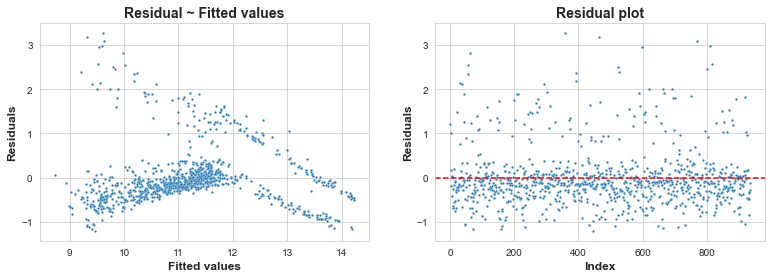

In [417]:
X = sm.add_constant(X_train_dumm_AIC)
Y = Y_train
model_AIC = sm.OLS(Y,X).fit()
# model.mse_model
# mse_sqrt = (np.sum((model.fittedvalues - Y)**2)/(len(Y)-1))**(0.5)

resid_AIC = model_AIC.resid
yhat_AIC = model_AIC.fittedvalues
# resid_studt = resid_best_adj/mse_sqrt

index = np.arange(1,len(resid_adj)+1)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13,4))
s1 = sns.scatterplot(x = yhat_adj, y = resid_adj, s = 6, ax = ax[0])
s1.set_title('Residual ~ Fitted values', fontdict = {'weight':'bold',
                                                    'size':14})
s1.set_xlabel('Fitted values', fontdict = {'weight':'bold',
                                                    'size':12})
s1.set_ylabel('Residuals', fontdict = {'weight':'bold', 'size':12})
s2 = sns.scatterplot(x = index, y = resid_adj, s = 6, ax = ax[1])
s2.set_title('Residual plot', fontdict = {'weight':'bold',
                                                    'size':14})
s2.set_xlabel('Index', fontdict = {'weight':'bold', 'size':12})
s2.set_ylabel('Residuals', fontdict = {'weight':'bold', 'size':12})
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

### Brown Forsthye test

In [418]:
k = len(Y_train) // 3


# For BIC:
d = pd.DataFrame({'Y_fit':yhat_BIC, 'res':resid_BIC})
y = d.sort_values(by = 'Y_fit')['res']
print(sts.levene(y[:k], y[k:2*k], y[2*k:3*k], center = 'median'))

# For AIC:
d = pd.DataFrame({'Y_fit':yhat_AIC, 'res':resid_AIC})
y = d.sort_values(by = 'Y_fit')['res']
print(sts.levene(y[:k], y[k:2*k], y[2*k:3*k], center = 'median'))

# For Adj R^2:
d = pd.DataFrame({'Y_fit':yhat_adj, 'res':resid_adj})
y = d.sort_values(by = 'Y_fit')['res']
print(sts.levene(y[:k], y[k:2*k], y[2*k:3*k], center = 'median'))

# Comment: accept (no hscedasticity)

LeveneResult(statistic=13.679525692557386, pvalue=1.3956190855400067e-06)
LeveneResult(statistic=15.526941411910713, pvalue=2.327410869851957e-07)
LeveneResult(statistic=15.2409203885452, pvalue=3.069816722642523e-07)


### Check for Normality

- Case I: **BIC**

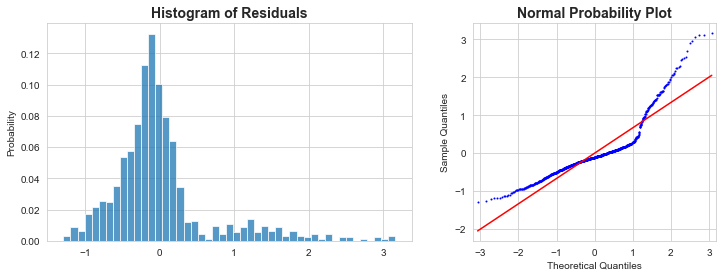

In [419]:
    # BIC
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4),
                      gridspec_kw = {'width_ratios': [1.5, 1]})
sns.histplot(resid_BIC, stat = 'probability', ax = ax[0])
sm.qqplot(resid_BIC, line = 's', ax = ax[1])
plt.setp(fig.axes[1].get_lines(), markersize = 1)
ax[0].set_title('Histogram of Residuals', fontdict = {'weight':'bold',
                                                     'size':14})
ax[1].set_title('Normal Probability Plot', fontdict = {'weight':'bold',
                                                     'size':14})
plt.show()

- Case II: **AIC**

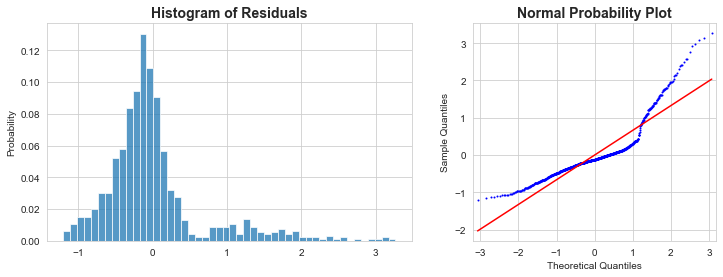

In [420]:
    # AIC
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4), 
                       gridspec_kw = {'width_ratios': [1.5, 1]})
sns.histplot(resid_AIC, stat = 'probability', ax = ax[0])
sm.qqplot(resid_AIC, line = 's', ax = ax[1])
plt.setp(fig.axes[1].get_lines(), markersize = 1)
ax[0].set_title('Histogram of Residuals', fontdict = {'weight':'bold',
                                                     'size':14})
ax[1].set_title('Normal Probability Plot', fontdict = {'weight':'bold',
                                                     'size':14})
plt.show()

- Case III: Adjusted $\small{R^2}$

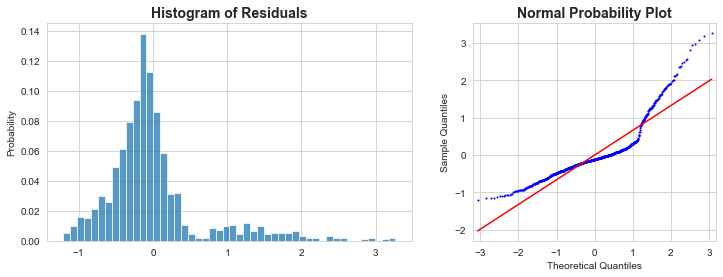

In [421]:
    # AIC
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4), 
                       gridspec_kw = {'width_ratios': [1.5, 1]})
sns.histplot(resid_adj, stat = 'probability', ax = ax[0])
sm.qqplot(resid_adj, line = 's', ax = ax[1])
plt.setp(fig.axes[1].get_lines(), markersize = 1)
ax[0].set_title('Histogram of Residuals', fontdict = {'weight':'bold',
                                                     'size':14})
ax[1].set_title('Normal Probability Plot', fontdict = {'weight':'bold',
                                                     'size':14})
plt.show()

### Outlier Check

- AIC

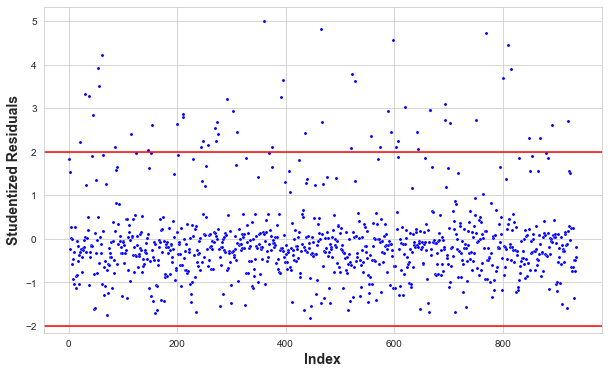

In [422]:
resid_std_AIC = model_AIC.outlier_test()['student_resid']

index = np.arange(1, len(resid_std_AIC)+1)

plt.figure(figsize = (10,6))
s = sns.scatterplot(x = index, y = resid_std_AIC, s = 10, color = 'blue')
plt.axhline(y = -2, color = 'red')
plt.axhline(y = 2, color = 'red')
s.set_xlabel('Index', fontdict = {'weight':'bold', 'size':14})
s.set_ylabel('Studentized Residuals', fontdict = {'weight':'bold', 'size':14})
plt.show()

- BIC

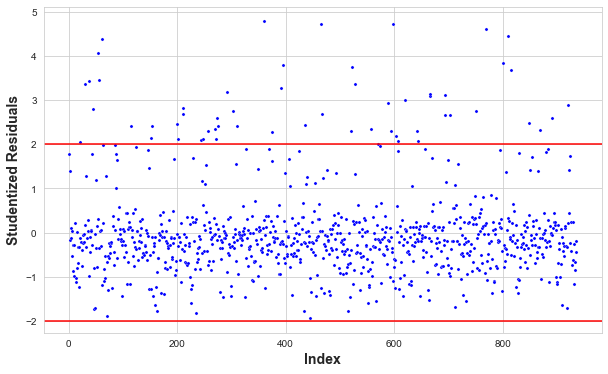

In [423]:
resid_std_BIC = model_BIC.outlier_test()['student_resid']

index = np.arange(1, len(resid_std_BIC)+1)

plt.figure(figsize = (10,6))
s = sns.scatterplot(x = index, y = resid_std_BIC, s = 10, color = 'blue')
plt.axhline(y = -2, color = 'red')
plt.axhline(y = 2, color = 'red')
s.set_xlabel('Index', fontdict = {'weight':'bold', 'size':14})
s.set_ylabel('Studentized Residuals', fontdict = {'weight':'bold', 'size':14})
plt.show()

- Adjusted $\small{R^2}$

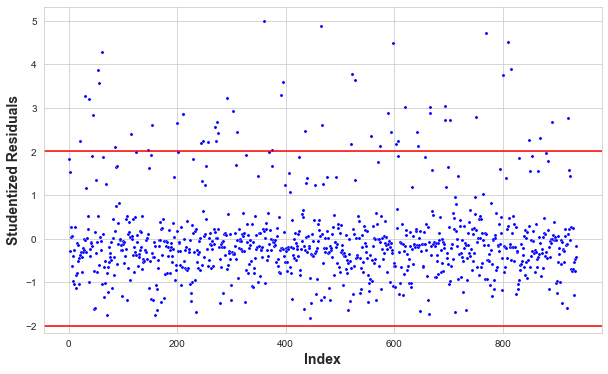

In [424]:
resid_std_adj = model_adj.outlier_test()['student_resid']

index = np.arange(1, len(resid_std_adj)+1)

plt.figure(figsize = (10,6))
s = sns.scatterplot(x = index, y = resid_std_adj, s = 10, color = 'blue')
plt.axhline(y = -2, color = 'red')
plt.axhline(y = 2, color = 'red')
s.set_xlabel('Index', fontdict = {'weight':'bold', 'size':14})
s.set_ylabel('Studentized Residuals', fontdict = {'weight':'bold', 'size':14})
plt.show()

### Leverage check

- AIC

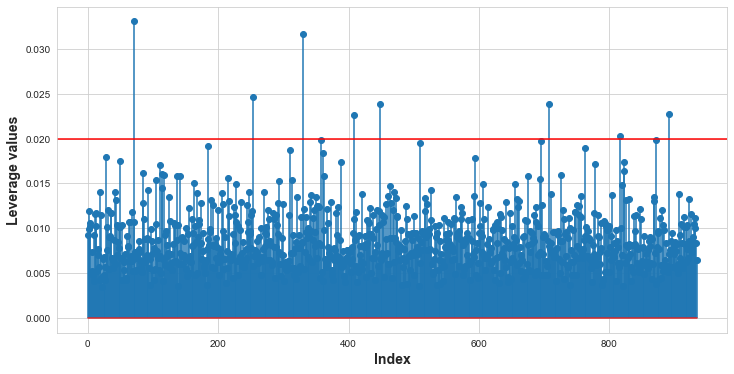

In [425]:
lev = model_AIC.get_influence().hat_matrix_diag
thrs = round(2*(len(best_subset_vars_AIC)+1)/935, 2)

plt.figure(figsize = (12,6))
plt.stem(lev)
plt.axhline(y = thrs, color = 'r')
plt.xlabel('Index', fontdict = {'weight':'bold', 'size':14})
plt.ylabel('Leverage values', fontdict = {'weight':'bold', 'size':14})
plt.show()

- Adjusted $\small{R^2}$

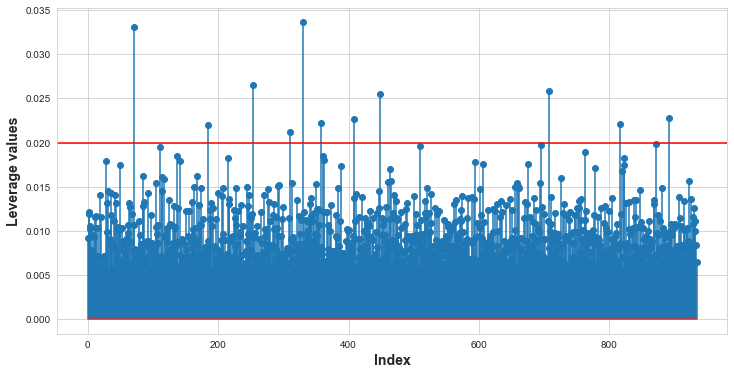

In [426]:
lev = model_adj.get_influence().hat_matrix_diag
thrs = round(2*(len(best_subset_vars_adj)+1)/935, 2)

plt.figure(figsize = (12,6))
plt.stem(lev)
plt.axhline(y = thrs, color = 'r')
plt.xlabel('Index', fontdict = {'weight':'bold', 'size':14})
plt.ylabel('Leverage values', fontdict = {'weight':'bold', 'size':14})
plt.show()

- BIC

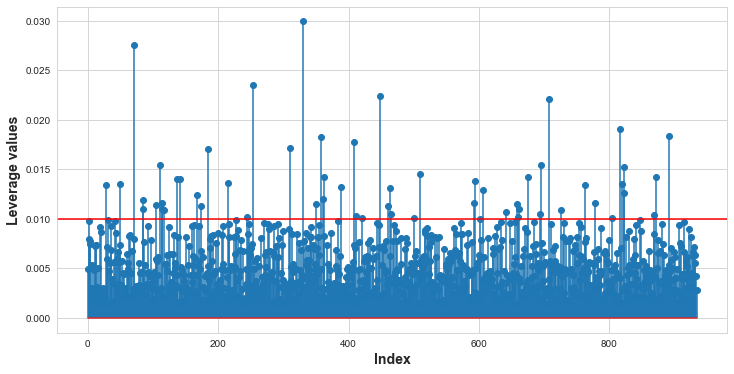

In [427]:
lev = model_BIC.get_influence().hat_matrix_diag
thrs = round(2*(len(best_subset_vars_BIC)+1)/935, 2)

plt.figure(figsize = (12,6))
plt.stem(lev)
plt.axhline(y = thrs, color = 'r')
plt.xlabel('Index', fontdict = {'weight':'bold', 'size':14})
plt.ylabel('Leverage values', fontdict = {'weight':'bold', 'size':14})
plt.show()

### Cook's Distance

- AIC

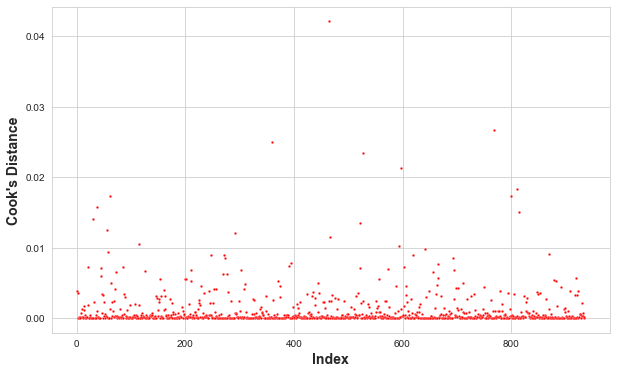

In [428]:
cooks_AIC = model_AIC.get_influence().cooks_distance[0]

p = len(X_train_dumm_AIC.columns)


index = np.arange(1, len(resid_AIC)+1)

plt.figure(figsize = (10,6))
s = sns.scatterplot(x = index, y = cooks_AIC, s = 6, color = 'red')
s.set_xlabel('Index', fontdict = {'weight':'bold', 'size':14})
s.set_ylabel("Cook's Distance", fontdict = {'weight':'bold', 'size':14})
plt.show()

- BIC

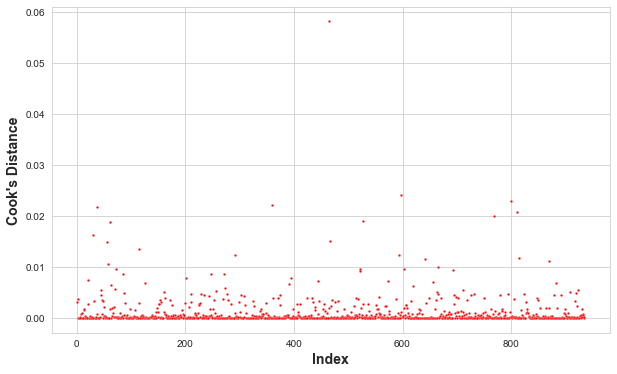

In [429]:
cooks_BIC = model_BIC.get_influence().cooks_distance[0]

p = len(X_train_dumm_BIC.columns)


index = np.arange(1, len(resid_BIC)+1)

plt.figure(figsize = (10,6))
s = sns.scatterplot(x = index, y = cooks_BIC, s = 6, color = 'red')
s.set_xlabel('Index', fontdict = {'weight':'bold', 'size':14})
s.set_ylabel("Cook's Distance", fontdict = {'weight':'bold', 'size':14})
plt.show()

#### After Update (BIC)

In [430]:
c = pd.DataFrame(cooks_BIC).rename(columns = {0:'cooks'})
d = pd.concat([X_train_dumm_BIC.reset_index().drop('index', axis = 1), 
           pd.DataFrame(Y_train).reset_index().drop('index', axis = 1), c], 
           axis = 1)
d = d[d['cooks'] < 0.05]

X_train_dumm_BIC = d.drop(['Y_new','cooks'], axis = 1)
Y_train_BIC = d['Y_new']

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     736.1
Date:                Thu, 02 May 2024   Prob (F-statistic):          3.41e-286
Time:                        16:06:59   Log-Likelihood:                -938.42
No. Observations:                 934   AIC:                             1887.
Df Residuals:                     929   BIC:                             1911.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8741      0.663    -14.883      0.0

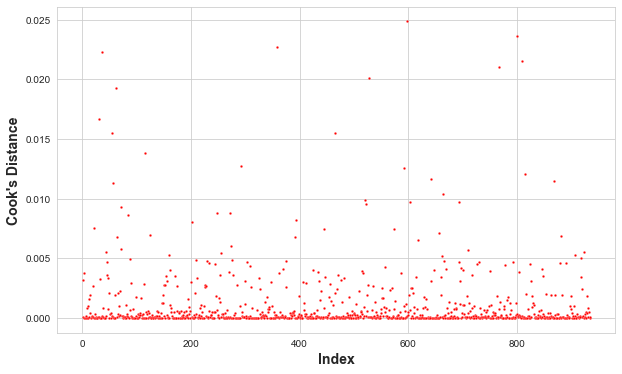

In [431]:
X = sm.add_constant(X_train_dumm_BIC)
Y = Y_train_BIC
model_BIC_new = sm.OLS(Y,X).fit()
print(model_BIC_new.summary())


cooks_BIC = model_BIC_new.get_influence().cooks_distance[0]
index = np.arange(1, len(resid_BIC))

plt.figure(figsize = (10,6))
s = sns.scatterplot(x = index, y = cooks_BIC, s = 6, color = 'red')
s.set_xlabel('Index', fontdict = {'weight':'bold', 'size':14})
s.set_ylabel("Cook's Distance", fontdict = {'weight':'bold', 'size':14})
plt.show()

- Adjusted $\small{R^2}$

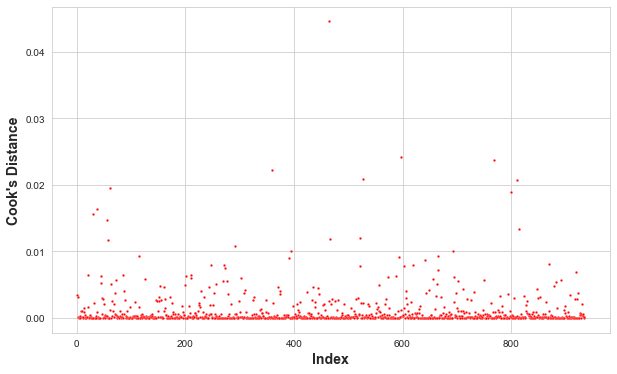

In [432]:
cooks_adj = model_adj.get_influence().cooks_distance[0]

p = len(X_train_dumm_adj.columns)


index = np.arange(1, len(resid_adj)+1)

plt.figure(figsize = (10,6))
s = sns.scatterplot(x = index, y = cooks_adj, s = 6, color = 'red')
s.set_xlabel('Index', fontdict = {'weight':'bold', 'size':14})
s.set_ylabel("Cook's Distance", fontdict = {'weight':'bold', 'size':14})
plt.show()

### Variance Inflation Factor

In [433]:
# BIC
vif = pd.DataFrame()
vif["Variable"] = X_train_dumm_BIC.columns
vif["VIF"] = [variance_inflation_factor(X_train_dumm_BIC.values, i) 
              for i in range(X_train_dumm_BIC.shape[1])]

vif

,Variable,VIF
0,Age,9.154838
1,Bmi,8.231420
2,Children,1.833918
3,Smoker_yes,1.263982


In [434]:
# AIC
vif = pd.DataFrame()
vif["Variable"] = X_train_dumm_AIC.columns
vif["VIF"] = [variance_inflation_factor(X_train_dumm_AIC.values, i) 
              for i in range(X_train_dumm_AIC.shape[1])]

vif

,Variable,VIF
0,Age,13.120998
1,Bmi,8.646511
2,Children,1.834774
3,Sex_male,2.108461
4,Smoker_yes,1.275619
5,Region_southeast,1.647437
6,Region_southwest,1.524763


In [435]:
# Adj R2
vif = pd.DataFrame()
vif["Variable"] = X_train_dumm_adj.columns
vif["VIF"] = [variance_inflation_factor(X_train_dumm_adj.values, i) 
              for i in range(X_train_dumm_adj.shape[1])]

vif

,Variable,VIF
0,Age,15.536048
1,Bmi,8.654146
2,Children,1.834775
3,Sex_male,2.110765
4,Smoker_yes,1.277240
5,Region_northwest,2.070675
6,Region_southeast,2.245877
7,Region_southwest,2.073007


#### After removing `'Age'` column:

In [436]:
X_train_dumm_adj = X_train_dumm_adj.drop('Age', axis = 1)

vif = pd.DataFrame()
vif["Variable"] = X_train_dumm_adj.columns
vif["VIF"] = [variance_inflation_factor(X_train_dumm_adj.values, i) 
              for i in range(X_train_dumm_adj.shape[1])]

vif

X = sm.add_constant(X_train_dumm_adj)
Y = Y_train
model_adj = sm.OLS(Y,X).fit()
print(model_adj.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     135.0
Date:                Thu, 02 May 2024   Prob (F-statistic):          9.32e-137
Time:                        16:06:59   Log-Likelihood:                -1278.4
No. Observations:                 935   AIC:                             2573.
Df Residuals:                     927   BIC:                             2611.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.4071      0.126  

### Model Validation

In [437]:
X_test_dumm = pd.get_dummies(X_test, drop_first = True)
X_test_dumm.head(5)

,Age,Bmi,Children,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
900,1.402711,0.004508,0,1,0,0,0,0
1064,1.340172,0.003608,4,0,0,0,0,1
1256,1.407599,0.001961,3,0,0,1,0,0
298,1.347966,0.002162,3,1,1,1,0,0
237,1.347966,0.001787,2,1,0,0,1,0


### MSPR

That model will be finally selected for which, **MSPR** is minimum

In [438]:
n = len(Y_test)

def mspr_calc(var):
    M = globals()['model_' + var[17:]]
    df_new = sm.add_constant(X_test_dumm[M.model.exog_names[1:]])
    yhat = M.predict(df_new)
    return round(np.sum((Y_test - yhat)**2)/n, 4)


print('For AIC: ' + str(mspr_calc('best_subset_vars_AIC')))
print('For BIC: ' + str(mspr_calc('best_subset_vars_BIC')))
print('For adj: ' + str(mspr_calc('best_subset_vars_adj')))

For AIC: 0.3966
For BIC: 0.4105
For adj: 0.9404


In [439]:
best_subset_vars_adj

['Age',
 'Bmi',
 'Children',
 'Sex_male',
 'Smoker_yes',
 'Region_northwest',
 'Region_southeast',
 'Region_southwest']

In [440]:
print(model_BIC.params)
print('_'*30)
print(model_BIC_new.params)

const          -9.821275
Age            15.156891
Bmi          -112.596849
Children        0.111277
Smoker_yes      2.312152
dtype: float64
______________________________
const          -9.874124
Age            15.210776
Bmi          -122.157186
Children        0.113570
Smoker_yes      2.317528
dtype: float64


In [441]:
X = sm.add_constant(X_test_dumm[best_subset_vars_BIC])
yhat = model_BIC_new.predict(X)
round(np.sum((Y_test - yhat)**2)/n, 4)

0.411

### Model Summary

#### For Train Data
- For Adjusted $R^2$

In [442]:
X = sm.add_constant(X_train_dumm_adj)
Y = Y_train
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     135.0
Date:                Thu, 02 May 2024   Prob (F-statistic):          9.32e-137
Time:                        16:07:00   Log-Likelihood:                -1278.4
No. Observations:                 935   AIC:                             2573.
Df Residuals:                     927   BIC:                             2611.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.4071      0.126  

- For AIC

In [443]:
X = sm.add_constant(X_train_dumm[best_subset_vars_AIC])
Y = Y_train
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     415.2
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.23e-280
Time:                        16:07:00   Log-Likelihood:                -943.21
No. Observations:                 935   AIC:                             1902.
Df Residuals:                     927   BIC:                             1941.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.5426      0.673  

- For BIC

In [444]:
X = sm.add_constant(X_train_dumm[best_subset_vars_BIC])
Y = Y_train
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     715.0
Date:                Thu, 02 May 2024   Prob (F-statistic):          6.51e-282
Time:                        16:07:00   Log-Likelihood:                -950.04
No. Observations:                 935   AIC:                             1910.
Df Residuals:                     930   BIC:                             1934.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8213      0.671    -14.638      0.0

#### For Test data
- For $R^2$

In [445]:
X = sm.add_constant(X_test_dumm.drop('Age', axis = 1))
Y = Y_test
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     62.12
Date:                Thu, 02 May 2024   Prob (F-statistic):           8.02e-60
Time:                        16:07:00   Log-Likelihood:                -554.67
No. Observations:                 402   AIC:                             1125.
Df Residuals:                     394   BIC:                             1157.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.2760      0.180  

- For AIC

In [446]:
X = sm.add_constant(X_test_dumm[best_subset_vars_AIC])
Y = Y_test
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     225.0
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.07e-133
Time:                        16:07:00   Log-Likelihood:                -380.72
No. Observations:                 402   AIC:                             777.4
Df Residuals:                     394   BIC:                             809.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.7250      0.950  

- For BIC

In [447]:
X = sm.add_constant(X_test_dumm[best_subset_vars_BIC])
Y = Y_test
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_new   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     376.1
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.46e-133
Time:                        16:07:00   Log-Likelihood:                -389.30
No. Observations:                 402   AIC:                             788.6
Df Residuals:                     397   BIC:                             808.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.9641      0.962    -11.398      0.0